In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
from scipy.signal import freqz
from Python_StartFiles import file_parser as fp
from Python_StartFiles import *
import math
import os

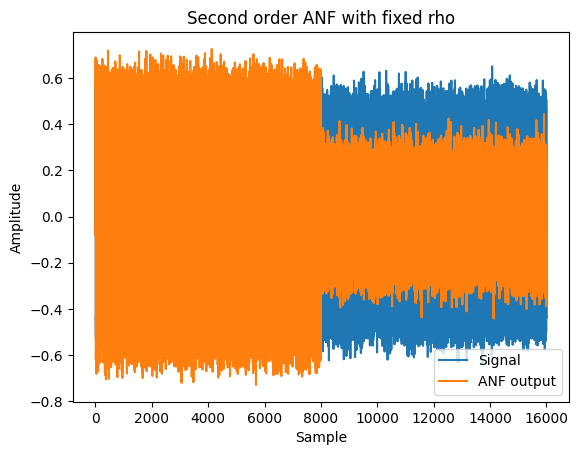

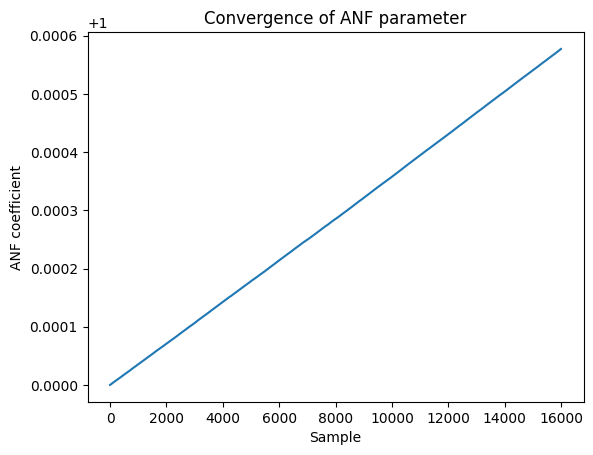

In [9]:
write_to_file_flag = True  # Flag to write input signal to file

##############################################################################
# Input signal creation
##############################################################################
fs = 8000  # Sampling frequency
freqs = [400, 1200]  # Frequencies to filter out

t = np.arange(0, fs) / fs  # Time vector
amplitude = 0.5  # Amplitude of input signal

# Create input signal
signal = amplitude * np.concatenate(
    ((np.sin(2 * np.pi * freqs[0] * t), np.sin(2 * np.pi * freqs[1] * t))))

N = len(signal)  # Number of samples in signal

# Add noise to input signal
stdev = 0.05
noise = np.random.normal(0, stdev, N)  # Noise vector
signal = signal + noise  # Noisy signal

##############################################################################
# Simulation of adaptive notch filter (ANF) with fixed rho
##############################################################################

# Initializations
e = np.zeros(N)  # ANF output signal vector
s = np.zeros(3)  # ANF state vector
a = np.zeros(N)  # ANF coefficient vector (for debugging only)

a_i = 1  # initialization of ANF parameter
rho = 0.8  # fixed rho
mu = 2 * 100 / (2 ** 31)  # 2 * mu

# Simulation loop (iterations over time)
for i in range(N):
    s[2] = s[1]
    s[1] = s[0]
    s[0] = signal[i] + rho * a_i * s[1] - (rho ** 2) * s[2]
    e[i] = s[0] - a_i * s[1] + s[2]
    a_i = a_i + 2 * mu * s[1] * e[i]
    a[i] = a_i

# Plot results
plt.figure()
plt.plot(signal)
plt.plot(e)
plt.title('Second order ANF with fixed rho')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend(['Signal', 'ANF output'])

# Plot convergence of ANF parameter
plt.figure()
plt.plot(a)
plt.title('Convergence of ANF parameter')
plt.xlabel('Sample')
plt.ylabel('ANF coefficient')
plt.show()

##############################################################################
# Write input signal to file
##############################################################################
if write_to_file_flag:
    # fix point in format 32q31 (32 bit signed integer, 31 bit fraction) expressed using astype
    # import file_parser as fp
    q = 31
    signal_q = (signal * (2 ** q)).astype(np.int32)
    datapath = 'input.pcm'
    fp.writes(signal_q, datapath)


### Q Factor for 400Hz

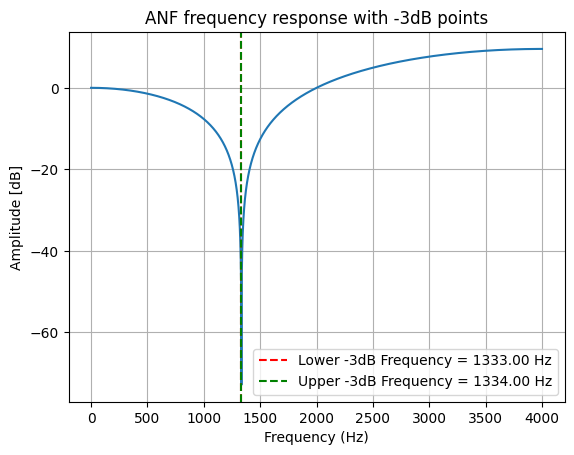

Lower -3dB Frequency: 1333.0 Hz
Upper -3dB Frequency: 1334.0000000000002 Hz
3dB Bandwidth: 1.0000000000002274 Hz
Q Factor: 399.99999999990905


In [10]:
import numpy as np
from scipy.signal import freqz
import matplotlib.pyplot as plt

# Given values
fs = 8000  # Sampling frequency
a_i = 1  # Initialization of ANF parameter
rho = 0.8  # Fixed rho

# Bode plot of ANF
w, h = freqz([1, -a_i, 1], worN=fs)

# Convert to dB
h_dB = 20 * np.log10(abs(h))

# Find the index of the minimum value in the response (deepest notch)
min_index = np.argmin(h_dB)

# Find the frequencies where the response is 3dB above the minimum
indices_3dB = np.where(h_dB >= h_dB[min_index] + 3)[0]

# Find the closest indices to the notch frequency
lower_index = indices_3dB[indices_3dB < min_index][-1]
upper_index = indices_3dB[indices_3dB > min_index][0]

# Convert indices to real frequencies
lower_freq = w[lower_index] * fs / (2 * np.pi)
upper_freq = w[upper_index] * fs / (2 * np.pi)

# Calculate 3dB bandwidth
bandwidth_3dB = upper_freq - lower_freq

# Assuming the center frequency is known (e.g., 400 Hz or 1200 Hz)
center_frequency = 400  # Adjusted to the visible notch in the provided plot

# Calculate Q factor
Q_factor = center_frequency / bandwidth_3dB

# Plot frequency response with the 3dB frequencies marked
plt.figure()
plt.plot(w * fs / (2 * np.pi), h_dB)  # Convert w to Hz for the x-axis
plt.axvline(x=lower_freq, color='r', linestyle='--', label=f'Lower -3dB Frequency = {lower_freq:.2f} Hz')
plt.axvline(x=upper_freq, color='g', linestyle='--', label=f'Upper -3dB Frequency = {upper_freq:.2f} Hz')
plt.title('ANF frequency response with -3dB points')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude [dB]')
plt.legend()
plt.grid(True)
plt.show()

print("Lower -3dB Frequency:", lower_freq, "Hz")
print("Upper -3dB Frequency:", upper_freq, "Hz")
print("3dB Bandwidth:", bandwidth_3dB, "Hz")
print("Q Factor:", Q_factor)


### Q Factor fro 1200 Hz

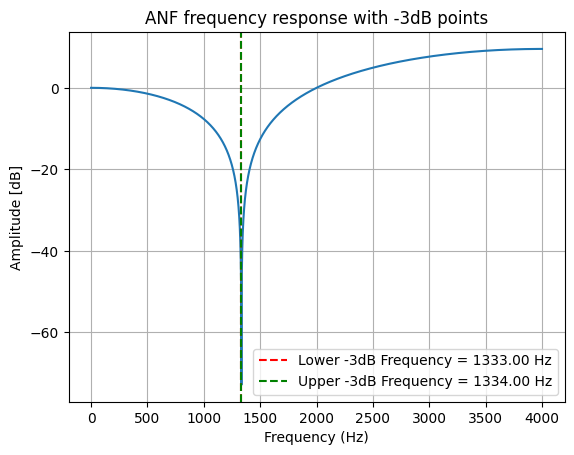

Lower -3dB Frequency: 1333.0 Hz
Upper -3dB Frequency: 1334.0000000000002 Hz
3dB Bandwidth: 1.0000000000002274 Hz
Q Factor: 1199.9999999997272


In [11]:
import numpy as np
from scipy.signal import freqz
import matplotlib.pyplot as plt

# Given values
fs = 8000  # Sampling frequency
a_i = 1  # Initialization of ANF parameter
rho = 0.8  # Fixed rho

# Bode plot of ANF
w, h = freqz([1, -a_i, 1], worN=fs)

# Convert to dB
h_dB = 20 * np.log10(abs(h))

# Find the index of the minimum value in the response (deepest notch)
min_index = np.argmin(h_dB)

# Find the frequencies where the response is 3dB above the minimum
indices_3dB = np.where(h_dB >= h_dB[min_index] + 3)[0]

# Find the closest indices to the notch frequency
lower_index = indices_3dB[indices_3dB < min_index][-1]
upper_index = indices_3dB[indices_3dB > min_index][0]

# Convert indices to real frequencies
lower_freq = w[lower_index] * fs / (2 * np.pi)
upper_freq = w[upper_index] * fs / (2 * np.pi)

# Calculate 3dB bandwidth
bandwidth_3dB = upper_freq - lower_freq

# Assuming the center frequency is known (e.g., 400 Hz or 1200 Hz)
center_frequency = 1200  # Adjusted to the visible notch in the provided plot

# Calculate Q factor
Q_factor = center_frequency / bandwidth_3dB

# Plot frequency response with the 3dB frequencies marked
plt.figure()
plt.plot(w * fs / (2 * np.pi), h_dB)  # Convert w to Hz for the x-axis
plt.axvline(x=lower_freq, color='r', linestyle='--', label=f'Lower -3dB Frequency = {lower_freq:.2f} Hz')
plt.axvline(x=upper_freq, color='g', linestyle='--', label=f'Upper -3dB Frequency = {upper_freq:.2f} Hz')
plt.title('ANF frequency response with -3dB points')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude [dB]')
plt.legend()
plt.grid(True)
plt.show()

print("Lower -3dB Frequency:", lower_freq, "Hz")
print("Upper -3dB Frequency:", upper_freq, "Hz")
print("3dB Bandwidth:", bandwidth_3dB, "Hz")
print("Q Factor:", Q_factor)


### Helper to convert the floatign point value to hexademical value

In [12]:
# Re-executing the code to convert the floating-point value 0.8 to fixed-point 16q16 and then to hexadecimal
rho_float = 0.8
rho_fixed_point = int(rho_float * (2 ** 16))
rho_hex = format(rho_fixed_point, 'X')

print("rho float in hex:", rho_hex)

mu_hex = format(int(mu * (2 ** 16)), 'X')

print("mu float in hex:", mu_hex)

lambda_float = 0.9
lambda_point = int(lambda_float * (2 ** 15))
lambda_hex = format(lambda_point, 'X')

print("mu float in hex:", lambda_hex)

lambda2_float = 1 - lambda_float
lambda2_point = int(lambda2_float * (2 ** 15))
lambda2_hex = format(lambda2_point, 'X')

print("mu float in hex:", lambda2_hex)

rho float in hex: CCCC
mu float in hex: 0
mu float in hex: 7333
mu float in hex: CCC


In [13]:
import os
import numpy as np


# Write data to file
def writes(data, datapath):
    # check that data only contains integers
    if not np.issubdtype(data.dtype, np.integer):
        raise ValueError('data must be integer type')

    if not np.issubdtype(data.dtype, np.int16):
        data = data.astype(np.int16)

    # check that data is 1D
    if data.ndim != 1:
        raise ValueError('data must be 1D')

    # write data to file in Little-endian ordering
    with open(datapath, 'wb') as f:
        data.tofile(f)


# Read data from file
def reads(datapath):
    # check that file exists
    if not os.path.isfile(datapath):
        raise ValueError('file does not exist')

    # read data from file in Little-endian ordering
    with open(datapath, 'rb') as f:
        data = np.fromfile(f, dtype=np.int16)
    return data


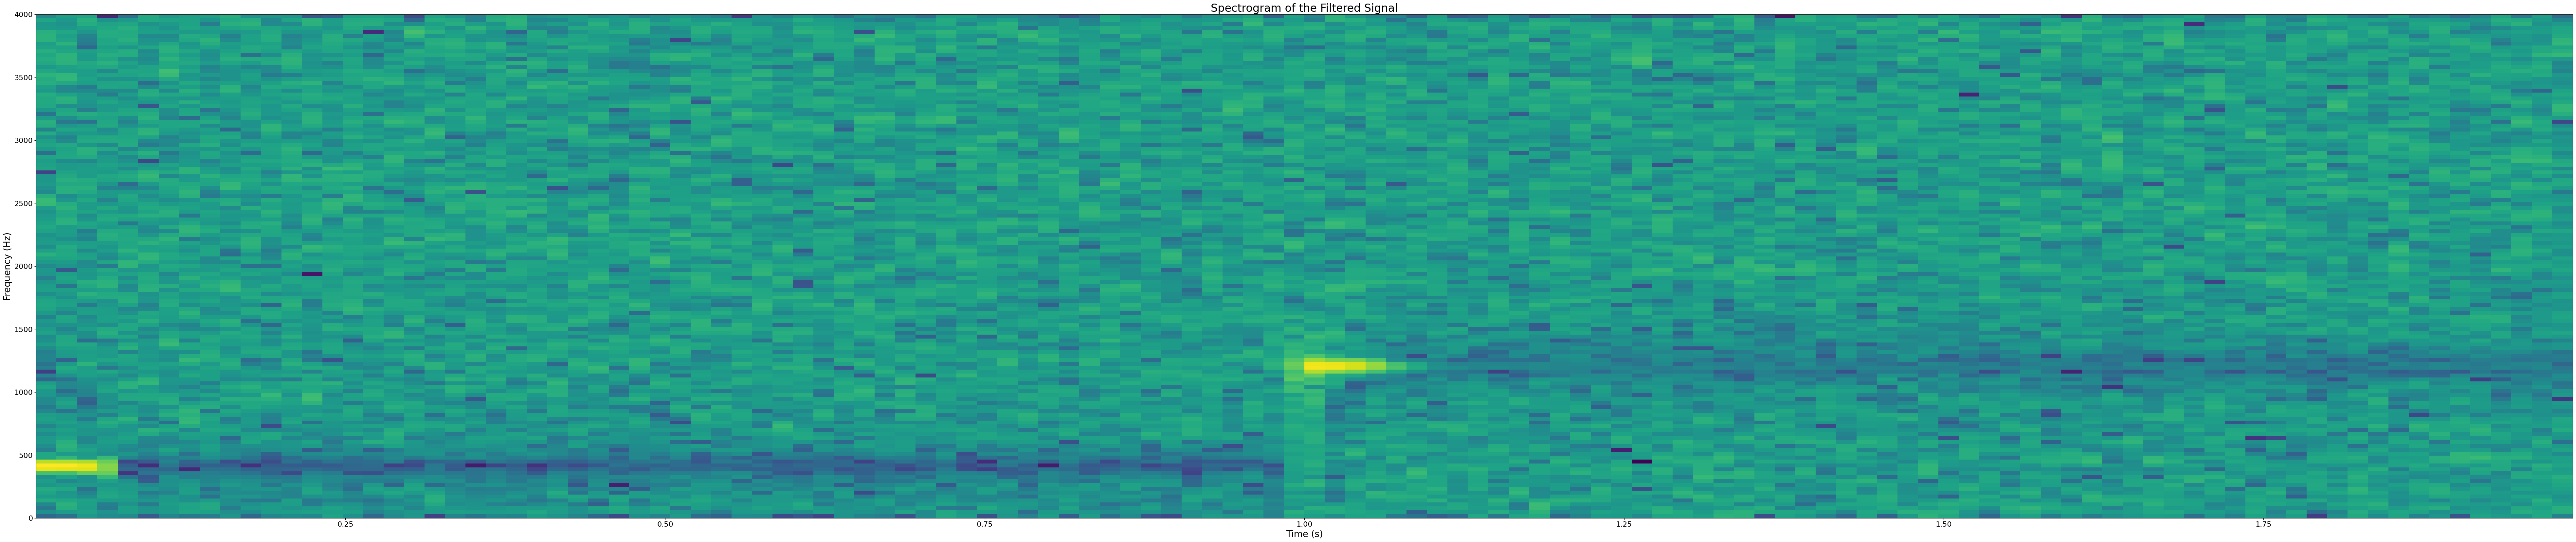

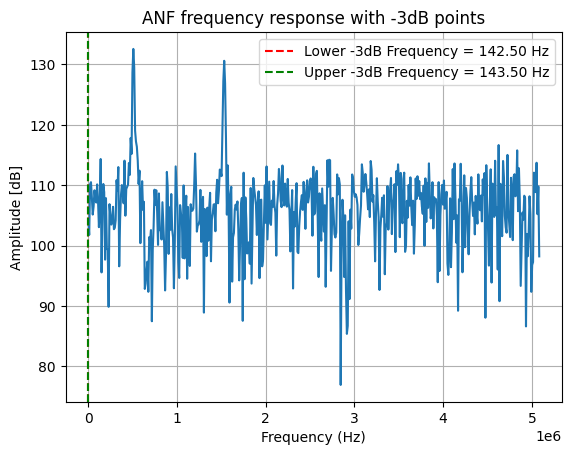

Lower -3dB Frequency: 142.5 Hz
Upper -3dB Frequency: 143.50000000000003 Hz
3dB Bandwidth: 1.0000000000000284 Hz
Q Factor: 1199.999999999966


In [28]:
anfData = reads("output_real_test.pcm")

# Plot a spectrogram and magnitude plot of the filtered signal
plt.figure(figsize=(100, 20))
plt.specgram(anfData, Fs=fs)
plt.xlabel('Time (s)', fontsize=20)  # Set the fontsize for x-axis label
plt.ylabel('Frequency (Hz)', fontsize=20)  # Set the fontsize for y-axis label
plt.title('Spectrogram of the Filtered Signal', fontsize=24)  # Set the fontsize for title
plt.tick_params(axis='both', which='major', labelsize=16)  # Set the fontsize for the tick labels on both axes
plt.show()

# plot the magnitude spectrum of the filtered signal using signal.freqz
w_y, h_y = sp.signal.freqz(anfData, fs = fs)
h_y_dB = 20 * np.log10(abs(h_y));
# fig, ax1 = plt.subplots()
# ax1.set_title('Filtered signal frequency response')
# ax1.plot(w_y, h_y_dB, 'b')
# ax1.set_ylabel('Amplitude [dB]', color='b')
# ax1.set_xlabel('Frequency [rad/sample]')
# ax2 = ax1.twinx()
# angles_y = np.unwrap(np.angle(h_y))
# ax2.plot(w_y, angles_y, 'g')
# ax2.set_ylabel('Angle (radians)', color='g')
# ax2.grid()
# ax2.axis('tight')
# plt.show()


# Find the index of the minimum value in the response (deepest notch)
min_index = np.argmin(h_y_dB)

# Find the frequencies where the response is 3dB above the minimum
indices_3dB = np.where(h_y_dB >= h_y_dB[min_index] + 3)[0]

# Find the closest indices to the notch frequency
lower_index = indices_3dB[indices_3dB < min_index][-1]
upper_index = indices_3dB[indices_3dB > min_index][0]

# Convert indices to real frequencies
lower_freq = w[lower_index] * fs / (2 * np.pi)
upper_freq = w[upper_index] * fs / (2 * np.pi)

# Calculate 3dB bandwidth
bandwidth_3dB = upper_freq - lower_freq

# Assuming the center frequency is known (e.g., 400 Hz or 1200 Hz)
center_frequency = 1200  # Adjusted to the visible notch in the provided plot

# Calculate Q factor
Q_factor = center_frequency / bandwidth_3dB

# Plot frequency response with the 3dB frequencies marked
plt.figure()
plt.plot(w_y * fs / (2 * np.pi), h_y_dB)  # Convert w to Hz for the x-axis
plt.axvline(x=lower_freq, color='r', linestyle='--', label=f'Lower -3dB Frequency = {lower_freq:.2f} Hz')
plt.axvline(x=upper_freq, color='g', linestyle='--', label=f'Upper -3dB Frequency = {upper_freq:.2f} Hz')
plt.title('ANF frequency response with -3dB points')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude [dB]')
plt.legend()
plt.grid(True)
plt.show()

print("Lower -3dB Frequency:", lower_freq, "Hz")
print("Upper -3dB Frequency:", upper_freq, "Hz")
print("3dB Bandwidth:", bandwidth_3dB, "Hz")
print("Q Factor:", Q_factor)
